<a href="https://colab.research.google.com/github/hasina1198/ML---Logistic-Regression/blob/master/ML_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:#0b486b">Machine Learning - Logistic Regression</span>

---


**Objective:**
You need to demonstrate your skills for applying regularized logistic regression to perform two-class and multi-class classification for real-world tasks. You also need to demonstrate your skill in recognizing under-fitting/overfitting situations. 

### Part-1 (Binary Classification):

For this problem, we will use a subset of [Wisconsin Breast cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). Note that this dataset has some information missing. 

**1.1 Data Munging (3 Marks)** 

Cleaning the data is essential when dealing with real world problems. Training and testing data is stored in "data/wisconsin_data" folder. You have to perform the following:
* Read the training and testing data. Print the number of features in the dataset.
* For the data label, print the total number of 1's and 0's in the training and testing data. Comment on the class distribution. Is it balanced or unbalanced?
* Print the number of features with missing entries.
* Fill the missing entries. For filling any feature, you can use either mean or median value of the feature values from observed entries.
* Normalize the training and testing data.

**1.2 Logistic Regression (5 Marks) ** 
Train logistic regression models with L1 regularization and L2 regularization using alpha = 0.1 and lambda = 0.1. Report accuracy, precision, recall, f1-score and print the confusion matrix.

**1.3 Choosing the best hyper-parameter (7 Marks)** 
* For L1 model, choose the best alpha value from the following set: {0.1,1,3,10,33,100,333,1000, 3333, 10000, 33333}.
* For L2 model, choose the best lambda value from the following set: {0.001, 0.003, 0.01, 0.03, 0.1,0.3,1,3,10,33}.

To choose the best hyperparameter (alpha/lambda) value, you have to do the following:
* For each value of hyperparameter, perform 100 random splits of training data into training and validation data. 
* Find the average validation accuracy for each 100 train/validate pairs.
The best hyperparameter will be the one that gives maximum validation accuracy. Use the best alpha and lambda parameter to re-train your final L1 and L2 regularized model. Evaluate the prediction performance on the test data and report the following:
* Precision
* Accuracy
* The top 5 features selected in decreasing order of feature weights.
* Confusion matrix

Finally, discuss if there is any sign of underfitting or overfitting with appropriate reasoning.

### Part-2 (Multiclass Classification):

For this experiment, we will use a small subset of [MNIST dataset for handwritten digits](http://yann.lecun.com/exdb/mnist/). This dataset has no missing data. You will have to implement one-versus-rest scheme to perform multi-class classification using a binary classifier based on L1 regularized logistic regression. 

**2.1 Read and understand the data, create a default One-vs-Rest Classifier  (3 Marks) **

1- Use the data from the file reduced_mnist.csv in the data directory. Begin by reading the data. Print the following information:

* Number of data points
* Total number of features
* Unique labels in the data

2- Split the data into 70% training data and 30% test data. Fit a One-vs-Rest Classifier (which uses Logistic regression classifier with alpha=1) on training data, and report accuracy, precision, recall on testing data.

**2.2 Choosing the best hyper-parameter (7 Marks)**

1- As in section **1.3** above, now create 10 random splits of training data into training and validation data. Choose the best value of alpha from the following set: {0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333}.
To choose the best alpha hyperparameter value, you have to do the following:

* For each value of hyperparameter, perform 10 random splits of training data into training and validation data as said above. 
* For each value of hyperparameter, use its 10 random splits and find the average training and validation accuracy.
* On a graph, plot both the average training accuracy (in red) and average validation accuracy (in blue) w.r.t. each hyperparameter setting. Comment on this graph by identifying regions of overfitting and underfitting. 
* Print the best value of alpha hyperparameter.

2- Evaluate the prediction performance on test data and report the following:
* Total number of non-zero features in the final model.
* The confusion matrix
* Precision, recall and accuracy for each class.

Finally, discuss if there is any sign of underfitting or overfitting with appropriate reasoning.

## References
* [Finding missing values](https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe)
* [Titanic Problem](http://nbviewer.jupyter.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb)
* [Numpy: Sorting and Searching](http://docs.scipy.org/doc/numpy/reference/routines.sort.html)
* [Multiclass Classification](http://scikit-learn.org/stable/modules/multiclass.html)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split

#PART-1

#1.1
train = pd.read_csv("data/wisconsin_data/train_wbcd.csv")
test = pd.read_csv("data/wisconsin_data/test_wbcd.csv")

print("Number of features in the dataset:")

train_rows, train_cols = train.shape
print("Training Data has: {} rows and {} cols".format(train_rows, train_cols))

test_rows, test_cols = test.shape
print("Testing Data has: {} rows and {} cols".format(test_rows, test_cols))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Number of features in the dataset:
Training Data has: 100 rows and 32 cols
Testing Data has: 20 rows and 32 cols


In [ ]:
print("Total number of 1's and 0's in the training data:")
print(train.Diagnosis.value_counts())

Total number of 1's and 0's in the training data:
B    58
M    42
Name: Diagnosis, dtype: int64


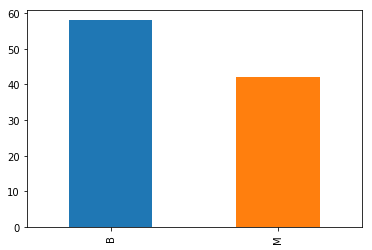

In [ ]:
train.Diagnosis.value_counts().plot(kind='bar')

In [ ]:
print("Total number of 1's and 0's in the testing data:")
print(test.Diagnosis.value_counts())

Total number of 1's and 0's in the testing data:
B    14
M     6
Name: Diagnosis, dtype: int64


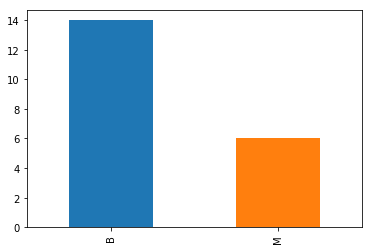

In [ ]:
test.Diagnosis.value_counts().plot(kind='bar')

In [ ]:
print("Number of features with missing entries:")
print("Training data:")
print(train.isnull().sum())
print("Total in training data: ",train.isnull().sum().sum())
print("Testing data:")
print(test.isnull().sum())
print("Total in testing data: ",test.isnull().sum().sum())

Number of features with missing entries:
Training data:
Patient_ID    0
Diagnosis     0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
f12           0
f13           0
f14           0
f15           0
f16           0
f17           0
f18           0
f19           0
f20           0
f21           2
f22           0
f23           0
f24           0
f25           0
f26           0
f27           0
f28           0
f29           0
f30           0
dtype: int64
Total in training data:  2
Testing data:
Patient_ID    0
Diagnosis     0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
f12           0
f13           0
f14           0
f15           0
f16           0
f17           0
f18           0
f19           0
f20           0
f21           1
f22       

In [ ]:
train = train.fillna(train.mean())


In [ ]:
test = test.fillna(test.mean())

In [ ]:
train_Y=train.iloc[:, 1]
train_X=train.iloc[:, 2:]

test_Y=test.iloc[:, 1]
test_X=test.iloc[:, 2:]

train_Xnorm = scale(train_X)
test_Xnorm = scale(test_X)

Model Accuracy is: 0.9
Model Recall is: 0.8809523809523809
Model Precision is: 0.8809523809523809
Model  F1-score is: 0.8809523809523809


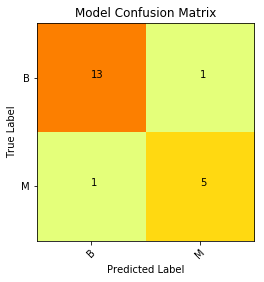

In [ ]:

#1.2
alpha_val = 0.1
lr_l1 = LogisticRegression(C=1/alpha_val, penalty='l1')
lr_l1.fit(train_Xnorm, train_Y)
y_predict_l1 = lr_l1.predict(test_Xnorm)
l1_acc = accuracy_score(y_predict_l1, test_Y)
l1_recall = recall_score(y_predict_l1, test_Y, average = 'macro')
l1_precision = precision_score(y_predict_l1, test_Y, average = 'macro')
l1_f = f1_score(y_predict_l1, test_Y, average = 'macro')
l1_confusion = confusion_matrix(y_predict_l1, test_Y)

print("Model Accuracy is: {}".format(l1_acc))
print("Model Recall is: {}".format(l1_recall))
print("Model Precision is: {}".format(l1_precision))
print("Model  F1-score is: {}".format(l1_f))

plt.clf()
plt.imshow(l1_confusion, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['B', 'M']
plt.title('Model Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
for i in range(len(classNames)):
    for j in range(len(classNames)):
        plt.text(j,i,str(l1_confusion[i][j]))
plt.show()


Model Accuracy is: 0.9
Model Recall is: 0.8809523809523809
Model Precision is: 0.8809523809523809
Model  F1-score is: 0.8809523809523809


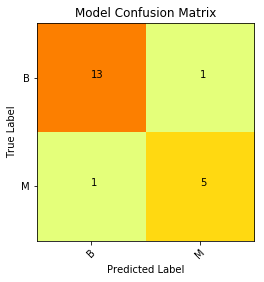

In [ ]:
lambda_val = 0.1
lr_l2 = LogisticRegression(C=1/lambda_val, penalty='l2')
lr_l2.fit(train_Xnorm, train_Y)
y_predict_l2 = lr_l2.predict(test_Xnorm)
l2_acc = accuracy_score(y_predict_l2, test_Y)
l2_recall = recall_score(y_predict_l2, test_Y, average = 'macro')
l2_precision = precision_score(y_predict_l2, test_Y, average = 'macro')
l2_f = f1_score(y_predict_l2, test_Y, average = 'macro')
l2_confusion = confusion_matrix(y_predict_l2, test_Y)

print("Model Accuracy is: {}".format(l2_acc))
print("Model Recall is: {}".format(l2_recall))
print("Model Precision is: {}".format(l2_precision))
print("Model  F1-score is: {}".format(l2_f))

plt.clf()
plt.imshow(l2_confusion, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['B', 'M']
plt.title('Model Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
for i in range(len(classNames)):
    for j in range(len(classNames)):
        plt.text(j,i,str(l2_confusion[i][j]))
plt.show()


In [ ]:

#1.3
def runLRmodel(trials, penalty_type, penalty_score):

   model_acc     = 0

   for i in range(0,trials):
      lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type)
      lr.fit(train_Xnorm, train_Y)
      y_predict = lr.predict(test_Xnorm)
      model_acc += accuracy_score(y_predict, test_Y)

   model_acc /= trials

   return np.round(model_acc, decimals=2)


In [ ]:
alpha_vals = [0.1,1,3,10,33,100,333,1000, 3333, 10000, 33333]
l1_acc = np.zeros(len(alpha_vals))
index = 0
for l in alpha_vals:
   l1_acc[index]= runLRmodel(100, 'l1', np.float(l))
   index += 1

print("Acc: {}".format(l1_acc))
max_index_l1  = np.argmax(l1_acc)
best_alpha = alpha_vals[max_index_l1]
print("Best Alpha: {}".format(best_alpha))

Acc: [0.9  0.95 0.95 0.9  0.95 0.7  0.7  0.7  0.7  0.7  0.7 ]
Best Alpha: 1


In [ ]:
lambda_vals = [0.001, 0.003, 0.01, 0.03, 0.1,0.3,1,3,10,33]
l2_acc = np.zeros(len(lambda_vals))
index = 0
for l in lambda_vals:
   l2_acc[index] = runLRmodel(100, 'l2', np.float(l))
   index += 1

print("Acc: {}".format(l2_acc))
max_index_l2  = np.argmax(l2_acc)
best_lambda = lambda_vals[max_index_l2]
print("Best Lambda: {}".format(best_lambda))


Acc: [0.85 0.85 0.9  0.9  0.9  0.9  0.95 0.95 0.95 0.95]
Best Lambda: 1


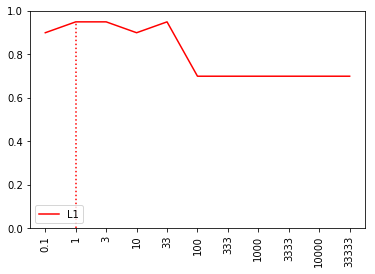

In [ ]:

plt.plot(range(0,len(alpha_vals)), l1_acc, color='r', label='L1')

plt.xticks(range(0,len(alpha_vals)), alpha_vals, rotation='vertical')

plt.plot((max_index_l1, max_index_l1), (0, l1_acc[max_index_l1]), ls='dotted', color='r')

axes = plt.gca()
axes.set_ylim([0, 1.0])

plt.legend(loc="lower left")
plt.show()

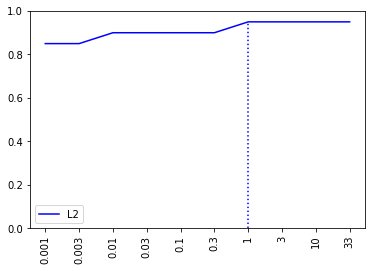

In [ ]:
plt.plot(range(0,len(lambda_vals)), l2_acc, color='b', label='L2')

plt.xticks(range(0,len(lambda_vals)), lambda_vals, rotation='vertical')

plt.plot((max_index_l2, max_index_l2), (0, l2_acc[max_index_l2]), ls='dotted', color='b')

axes = plt.gca()
axes.set_ylim([0, 1.0])

plt.legend(loc="lower left")
plt.show()

Model Accuracy is: 0.95
Model Recall is: 0.9666666666666667
Model Precision is: 0.9166666666666667
Model  F1-score is: 0.9373040752351097


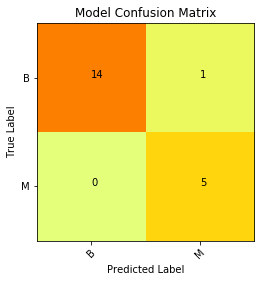

The Top 5 features are feature number:  [[23 22 25  8 30]]


In [ ]:
alpha_val = 1
lr_l1 = LogisticRegression(C=1/alpha_val, penalty='l1')
lr_l1.fit(train_Xnorm, train_Y)
y_predict_l1 = lr_l1.predict(test_Xnorm)
l1_acc = accuracy_score(y_predict_l1, test_Y)
l1_recall = recall_score(y_predict_l1, test_Y, average = 'macro')
l1_precision = precision_score(y_predict_l1, test_Y, average = 'macro')
l1_f = f1_score(y_predict_l1, test_Y, average = 'macro')
l1_confusion = confusion_matrix(y_predict_l1, test_Y)

print("Model Accuracy is: {}".format(l1_acc))
print("Model Recall is: {}".format(l1_recall))
print("Model Precision is: {}".format(l1_precision))
print("Model  F1-score is: {}".format(l1_f))

plt.clf()
plt.imshow(l1_confusion, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['B', 'M']
plt.title('Model Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
for i in range(len(classNames)):
    for j in range(len(classNames)):
        plt.text(j,i,str(l1_confusion[i][j]))
plt.show()

l1_coef = lr_l1.coef_
l1_features = np.argsort(-l1_coef)+1
print("The Top 5 features are feature number: ",l1_features[:5,:5])


Model Accuracy is: 0.95
Model Recall is: 0.9666666666666667
Model Precision is: 0.9166666666666667
Model  F1-score is: 0.9373040752351097


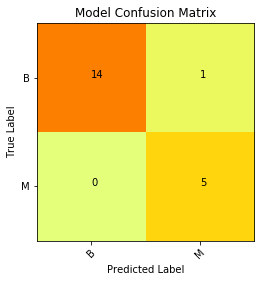

The Top 5 features are feature number:  [[22  2 23 25 21]]


In [ ]:
lambda_val = 1
lr_l2 = LogisticRegression(C=1/lambda_val, penalty='l2')
lr_l2.fit(train_Xnorm, train_Y)
y_predict_l2 = lr_l2.predict(test_Xnorm)
l2_acc = accuracy_score(y_predict_l2, test_Y)
l2_recall = recall_score(y_predict_l2, test_Y, average = 'macro')
l2_precision = precision_score(y_predict_l2, test_Y, average = 'macro')
l2_f = f1_score(y_predict_l2, test_Y, average = 'macro')
l2_confusion = confusion_matrix(y_predict_l2, test_Y)

print("Model Accuracy is: {}".format(l2_acc))
print("Model Recall is: {}".format(l2_recall))
print("Model Precision is: {}".format(l2_precision))
print("Model  F1-score is: {}".format(l2_f))

plt.clf()
plt.imshow(l2_confusion, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['B', 'M']
plt.title('Model Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
for i in range(len(classNames)):
    for j in range(len(classNames)):
        plt.text(j,i,str(l2_confusion[i][j]))
        
plt.show()

l2_coef = lr_l2.coef_
l2_features = np.argsort(-l2_coef)+1
print("The Top 5 features are feature number: ",l2_features[:5,:5])


In [ ]:

#PART-2

#2.1

dataset = pd.read_csv("data/mnist/reduced_mnist.csv")

print("Number of data points in the dataset:")

rows, cols = dataset.shape
print("Data has: {} rows and {} cols".format(rows, cols))

print("Number of features in the dataset:")

print("Data has: {} featuress:".format(cols-1))

print("Labels in the dataset:")
print(dataset.label.value_counts())


Number of data points in the dataset:
Data has: 2520 rows and 785 cols
Number of features in the dataset:
Data has: 784 featuress:
Labels in the dataset:
1    286
2    269
3    258
0    257
7    256
6    243
4    243
8    239
9    238
5    231
Name: label, dtype: int64


In [ ]:

Dtrain,Dtest = train_test_split(dataset, test_size=0.3)

print(Dtrain.shape)
print(Dtest.shape)


(1764, 785)
(756, 785)


Model Accuracy is: 1.0
Model Recall is: 1.0
Model Precision is: 1.0
Model  F1-score is: 1.0


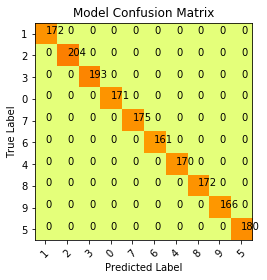

In [ ]:

train_Y=Dtrain.iloc[:, 0]
train_X=Dtrain.iloc[:, 1:]

test_Y=Dtest.iloc[:, 0]
test_X=Dtest.iloc[:, 1:]

alpha_val = 0.1
lr = LogisticRegression(C=1/alpha_val, penalty='l1', multi_class='ovr')sni
lr.fit(train_X, train_Y)
y_predict = lr.predict(train_X)
acc = accuracy_score(y_predict, train_Y)
recall = recall_score(y_predict, train_Y, average = 'macro')
precision = precision_score(y_predict, train_Y, average = 'macro')
f = f1_score(y_predict, train_Y, average = 'macro')
confusion = confusion_matrix(y_predict, train_Y)

print("Model Accuracy is: {}".format(acc))
print("Model Recall is: {}".format(recall))
print("Model Precision is: {}".format(precision))
print("Model  F1-score is: {}".format(f))
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['1','2', '3', '0', '7', '6', '4', '8', '9', '5']
plt.title('Model Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
for i in range(len(classNames)):
    for j in range(len(classNames)):
        plt.text(j,i,str(confusion[i][j]))
        
plt.show()


In [ ]:

#2.2
def runLRmodelmc(trials, data, penalty_type, penalty_score):

   model_accv     = 0
   model_acct     = 0

   for i in range(0,trials):
      Dtrain, Dtest = train_test_split(data, test_size=0.3)
      train_Y = Dtrain.iloc[:, 0]
      train_X = Dtrain.iloc[:, 1:]

      test_Y = Dtest.iloc[:, 0]
      test_X = Dtest.iloc[:, 1:]
      lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type, multi_class='ovr')
      lr.fit(train_X, train_Y)
      y_predictv = lr.predict(test_X)
      y_predictt = lr.predict(train_X)
      model_accv += accuracy_score(y_predictv, test_Y)
      model_acct += accuracy_score(y_predictt, train_Y)

   model_accv /= trials
   model_acct /= trials

   return np.round(model_accv, decimals=2),np.round(model_acct, decimals=2)

In [ ]:
alpha_vals = [0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333]
l1_accv = np.zeros(len(alpha_vals))
l1_acct = np.zeros(len(alpha_vals))
index = 0

for l in alpha_vals:
    l1_accv[index],l1_acct[index]= runLRmodelmc(10, Dtrain, 'l1', np.float(l))
    index += 1

print("Validation Accuracy: {}".format(l1_accv))
print("Training Accuracy: {}".format(l1_acct))
max_index_v  = np.argmax(l1_accv)
best_alpha_v = alpha_vals[max_index_v]
max_index_t  = np.argmax(l1_acct)
best_alpha_t = alpha_vals[max_index_t]
print("Best validation Alpha: {}".format(best_alpha_v))
print("Best Training Alpha: {}".format(best_alpha_t))

Validation Accuracy: [0.84 0.84 0.83 0.84 0.84 0.84 0.86 0.84 0.79 0.7  0.54]
Training Accuracy: [1.   1.   1.   1.   1.   1.   0.97 0.91 0.83 0.73 0.56]
Best validation Alpha: 333
Best Training Alpha: 0.1


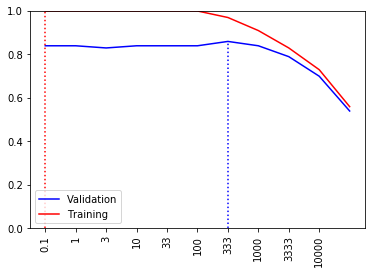

In [ ]:

plt.plot(range(0,len(alpha_vals)), l1_accv, color='b', label='Validation')
plt.plot(range(0,len(alpha_vals)), l1_acct, color='r', label='Training')
plt.xticks(range(0,len(lambda_vals)), alpha_vals, rotation='vertical')

plt.plot((max_index_v, max_index_v), (0, l1_accv[max_index_v]), ls='dotted', color='b')
plt.plot((max_index_t, max_index_t), (0, l1_acct[max_index_t]), ls='dotted', color='r')

#Set the y-axis from 0 to 1.0
axes = plt.gca()
axes.set_ylim([0, 1.0])

plt.legend(loc="lower left")
plt.show()

Model Accuracy is: 0.8796296296296297
Model Recall is: 0.8770827231254243
Model Precision is: 0.8771080030327134
Model F1-score is: 0.8759345252138775


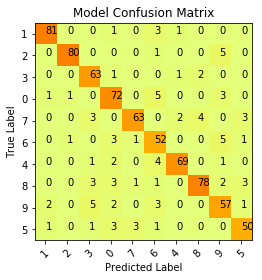

In [ ]:
alpha_val = 333
lr = LogisticRegression(C=1/alpha_val, penalty='l1', multi_class='ovr')
lr.fit(train_X, train_Y)
y_predict = lr.predict(test_X)
acc = accuracy_score(y_predict, test_Y)
recall = recall_score(y_predict, test_Y, average = 'macro')
precision = precision_score(y_predict, test_Y, average = 'macro')
f = f1_score(y_predict, test_Y, average = 'macro')
confusion = confusion_matrix(y_predict, test_Y)

print("Model Accuracy is: {}".format(acc))
print("Model Recall is: {}".format(recall))
print("Model Precision is: {}".format(precision))
print("Model F1-score is: {}".format(f))

plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['1','2', '3', '0', '7', '6', '4', '8', '9', '5']
plt.title('Model Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
for i in range(len(classNames)):
    for j in range(len(classNames)):
        plt.text(j,i,str(confusion[i][j]))
plt.show()


In [ ]:
total = 0
correct_predict  = 0
for i in range(len(classNames)):
    for j in range(len(classNames)):
        total+=confusion[i][j]
        if(i == j):
            correct_predict+=confusion[i][j]

r = len(classNames)
x = 0
predict_sum = [sum(x) for x in zip(*confusion)]
actual_sum = np.sum(confusion,axis=1).tolist()

print("Accuracy of Each Class:")

for i in range(r):
    c = 0
    x = correct_predict + predict_sum[i]
    c = x/total
    print("Class ",classNames[i],":",c)
    x = 0

print()
print("Recall of Each Class:")
for i in range(r):
    c = 0
    c = confusion[i,i]/actual_sum[i]
    print("Class ",classNames[i]," is :",c)
    
print()
print("Precision of Each Class:")    
for i in range(r):
    c = 0
    c = confusion[i,i]/predict_sum[i]
    print("Class ",classNames[i]," is :",c)


Accuracy of Each Class:
Class  1 : 0.9920634920634921
Class  2 : 0.9880952380952381
Class  3 : 0.9801587301587301
Class  0 : 0.9947089947089947
Class  7 : 0.9695767195767195
Class  6 : 0.9722222222222222
Class  4 : 0.9761904761904762
Class  8 : 0.9907407407407407
Class  9 : 0.9761904761904762
Class  5 : 0.9563492063492064

Recall of Each Class:
Class  1  is : 0.9418604651162791
Class  2  is : 0.9302325581395349
Class  3  is : 0.9402985074626866
Class  0  is : 0.8780487804878049
Class  7  is : 0.84
Class  6  is : 0.8253968253968254
Class  4  is : 0.8961038961038961
Class  8  is : 0.8571428571428571
Class  9  is : 0.8142857142857143
Class  5  is : 0.847457627118644

Precision of Each Class:
Class  1  is : 0.9529411764705882
Class  2  is : 0.975609756097561
Class  3  is : 0.8289473684210527
Class  0  is : 0.8275862068965517
Class  7  is : 0.9264705882352942
Class  6  is : 0.7428571428571429
Class  4  is : 0.9452054794520548
Class  8  is : 0.9285714285714286
Class  9  is : 0.78082191780821